
<h1><center>Los Angeles Crime Data Analysis</center></h1>

In [6]:
# Import Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import TimeSeriesSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

import warnings

In [7]:
# Set display options for pandas.
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

<h1><center>Import and transform data</center></h1>

In [8]:
# Upload data and verify successful upload.
la_crime = pd.read_csv('/Users/michaelperrine/Library/CloudStorage/OneDrive-Personal/Documents/Bellevue/Predictive Analytics/LA-Crime-Data/crime_data copy.csv')
la_crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,Mocodes,Vict Age,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,201804032,1/1/2020 0:00,1/1/2020 0:00,1250,18,Southeast,1823,1,210,ROBBERY,1822 0344 0400 0342,50,M,B,102.0,SIDEWALK,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,210.0,NaN,NaN,NaN,CENTURY,AVALON BL,33.9456,-118.2652
1,201804035,1/1/2020 0:00,1/1/2020 0:00,1430,18,Southeast,1802,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1810,53,F,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,745.0,NaN,NaN,NaN,8700 S FIGUEROA ST,NaN,33.9587,-118.2827
2,201904054,1/1/2020 0:00,1/1/2020 0:00,1300,19,Mission,1998,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),0325,39,F,H,405.0,CLOTHING STORE,NaN,NaN,AA,Adult Arrest,442.0,NaN,NaN,NaN,7800 VAN NUYS BL,NaN,34.2153,-118.4409
3,201804023,1/1/2020 0:00,1/1/2020 0:00,140,18,Southeast,1802,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,2000 1813 0400 2033,34,M,H,501.0,SINGLE FAMILY DWELLING,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,626.0,NaN,NaN,NaN,300 W 91ST PL,NaN,33.9536,-118.2782
4,201704023,1/1/2020 0:00,1/1/2020 0:00,20,17,Devonshire,1785,2,624,BATTERY - SIMPLE ASSAULT,0416,17,M,H,103.0,ALLEY,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,624.0,NaN,NaN,NaN,18700 NORDHOFF ST,NaN,34.2355,-118.5404


In [9]:
# Check data types.
la_crime.dtypes

DR_NO               int64
Date Rptd          object
DATE OCC           object
TIME OCC            int64
AREA                int64
AREA NAME          object
Rpt Dist No         int64
Part 1-2            int64
Crm Cd              int64
Crm Cd Desc        object
Mocodes            object
Vict Age            int64
Vict Sex           object
Vict Descent       object
Premis Cd         float64
Premis Desc        object
Weapon Used Cd    float64
Weapon Desc        object
Status             object
Status Desc        object
Crm Cd 1          float64
Crm Cd 2          float64
Crm Cd 3          float64
Crm Cd 4          float64
LOCATION           object
Cross Street       object
LAT               float64
LON               float64
dtype: object

In [10]:
# Count null values.
la_crime.isnull().sum()

DR_NO                   0
Date Rptd               0
DATE OCC                0
TIME OCC                0
AREA                    0
AREA NAME               0
Rpt Dist No             0
Part 1-2                0
Crm Cd                  0
Crm Cd Desc             0
Mocodes            151691
Vict Age                0
Vict Sex           144717
Vict Descent       144729
Premis Cd              16
Premis Desc           588
Weapon Used Cd     677816
Weapon Desc        677816
Status                  1
Status Desc             0
Crm Cd 1               11
Crm Cd 2           935904
Crm Cd 3          1002748
Crm Cd 4          1004998
LOCATION                0
Cross Street       850825
LAT                     0
LON                     0
dtype: int64

In [11]:
# drop redundant and null values.
la_crime.drop(['Date Rptd','Mocodes', 
                'Vict Sex',
                'Vict Descent', 
                'Premis Cd', 
                'Premis Desc',
                'Weapon Used Cd',
                'Weapon Desc',
                'Crm Cd 1',
                'Crm Cd 2',
                'Crm Cd 3',
                'Crm Cd 4',
                'Cross Street',
                'LOCATION',
                'AREA NAME',
                'Status',
                'Crm Cd Desc'], axis=1, inplace=True)

In [12]:
# Display column names.
la_crime.columns

Index(['DR_NO', 'DATE OCC', 'TIME OCC', 'AREA', 'Rpt Dist No', 'Part 1-2',
       'Crm Cd', 'Vict Age', 'Status Desc', 'LAT', 'LON'],
      dtype='object')

In [13]:
# Rename columns.
la_crime = la_crime.rename(columns={'DR_NO':'dr_no',
                'DATE OCC':'date',
                'TIME OCC': 'time',
                'AREA':'area',
                'Rpt Dist No':'rpt_dist_no',
                'Part 1-2':'part_1_2',
                'Crm Cd':'crm_cd',
                'Vict Age':'vict_age',
                'Status Desc':'status_desc',
                'LAT':'lat',
                'LON':'lon'})

In [14]:
# View data types.
la_crime.dtypes

dr_no            int64
date            object
time             int64
area             int64
rpt_dist_no      int64
part_1_2         int64
crm_cd           int64
vict_age         int64
status_desc     object
lat            float64
lon            float64
dtype: object

In [15]:
# Display cleaned dataset.
la_crime.head()

,dr_no,date,time,area,rpt_dist_no,part_1_2,crm_cd,vict_age,status_desc,lat,lon
0,201804032,1/1/2020 0:00,1250,18,1823,1,210,50,Invest Cont,33.9456,-118.2652
1,201804035,1/1/2020 0:00,1430,18,1802,2,745,53,Invest Cont,33.9587,-118.2827
2,201904054,1/1/2020 0:00,1300,19,1998,1,442,39,Adult Arrest,34.2153,-118.4409
3,201804023,1/1/2020 0:00,140,18,1802,2,626,34,Invest Cont,33.9536,-118.2782
4,201704023,1/1/2020 0:00,20,17,1785,2,624,17,Adult Other,34.2355,-118.5404


In [16]:
# Convert date column to datetime format.
la_crime['date'] = pd.to_datetime(la_crime['date'])



<h1><center>Filter Data by Year</center></h1>

In [17]:
# First group 2020.
la_crime_2020 = la_crime[(la_crime['date']>='2020/01/01') & (la_crime['date']<='2020/12/31')]
la_crime_2020['vict_age']= la_crime_2020['vict_age'].abs()
la_crime_2020.head()


,dr_no,date,time,area,rpt_dist_no,part_1_2,crm_cd,vict_age,status_desc,lat,lon
0,201804032,2020-01-01,1250,18,1823,1,210,50,Invest Cont,33.9456,-118.2652
1,201804035,2020-01-01,1430,18,1802,2,745,53,Invest Cont,33.9587,-118.2827
2,201904054,2020-01-01,1300,19,1998,1,442,39,Adult Arrest,34.2153,-118.4409
3,201804023,2020-01-01,140,18,1802,2,626,34,Invest Cont,33.9536,-118.2782
4,201704023,2020-01-01,20,17,1785,2,624,17,Adult Other,34.2355,-118.5404


In [18]:
# Dimension of 2020 data.
la_crime_2020.shape

(199847, 11)

In [19]:
# Second group 2021.
la_crime_2021 = la_crime[(la_crime['date']>='2021-/1/01') & (la_crime['date']<='2021/12/31')]
la_crime_2021['vict_age']= la_crime_2021['vict_age'].abs()
la_crime_2021.head()


,dr_no,date,time,area,rpt_dist_no,part_1_2,crm_cd,vict_age,status_desc,lat,lon
192865,211304029,2021-01-01,1425,13,1367,1,761,35,Adult Arrest,34.0018,-118.2478
192866,210904022,2021-01-01,1645,9,946,1,230,71,Adult Other,34.1794,-118.4312
192867,211204119,2021-01-01,1830,12,1265,1,310,35,Adult Other,33.9610,-118.2923
192868,211204017,2021-01-01,100,12,1266,1,510,0,Invest Cont,33.9650,-118.2783
192869,211004049,2021-01-01,1310,10,1039,1,440,0,Invest Cont,34.1903,-118.4800


In [20]:
# Dimension of 2021 data.
la_crime_2021.shape

(209876, 11)

In [21]:
# Third group 2022.
la_crime_2022 = la_crime[(la_crime['date']>='2022/01/01') & (la_crime['date']<='2022/12/31')]
la_crime_2022['vict_age']= la_crime_2022['vict_age'].abs()
la_crime_2022.head()


,dr_no,date,time,area,rpt_dist_no,part_1_2,crm_cd,vict_age,status_desc,lat,lon
401146,221804053,2022-01-01,2105,18,1863,1,330,55,Invest Cont,33.9265,-118.2652
401147,222004100,2022-01-01,200,20,2055,2,745,25,Invest Cont,34.0491,-118.2968
401148,221904005,2022-01-01,330,19,1911,2,626,33,Adult Other,34.3107,-118.4741
401149,221004314,2022-01-01,1205,10,1045,2,354,47,Invest Cont,34.1749,-118.5308
401150,221404013,2022-01-01,40,14,1463,1,440,27,Invest Cont,33.9805,-118.4111


In [22]:
# Dimension of 2022 data.
la_crime_2022.shape

(235258, 11)

In [23]:
# Fourth group 2023.
la_crime_2023 = la_crime[(la_crime['date']>='2023/01/01') & (la_crime['date']<='2023/12/31')]
la_crime_2023['vict_age']= la_crime_2023['vict_age'].abs()
la_crime_2023.head()

,dr_no,date,time,area,rpt_dist_no,part_1_2,crm_cd,vict_age,status_desc,lat,lon
636255,231204066,2023-01-01,2245,12,1252,1,210,33,Invest Cont,33.9757,-118.3265
636256,231204028,2023-01-01,1235,12,1269,1,230,42,Adult Other,33.9656,-118.2651
636257,231804020,2023-01-01,622,18,1849,2,354,31,Invest Cont,33.9305,-118.2307
636258,231404035,2023-01-01,1640,14,1469,1,230,27,Invest Cont,33.9773,-118.3705
636259,231304042,2023-01-01,230,13,1373,2,626,20,Invest Cont,33.9957,-118.2652


In [24]:
# Dimension of 2023 data.
la_crime_2023.shape

(232345, 11)

In [25]:
# Fifth group 2024.
la_crime_2024 = la_crime[(la_crime['date']>='2024/01/01') & (la_crime['date']<='2024/12/31')]
la_crime_2024['vict_age']= la_crime_2024['vict_age'].abs()
la_crime_2024.head()

,dr_no,date,time,area,rpt_dist_no,part_1_2,crm_cd,vict_age,status_desc,lat,lon
870846,240504105,2024-01-01,1255,5,557,2,740,83,Invest Cont,33.7424,-118.2946
870889,241004029,2024-01-01,2134,10,1061,1,310,27,Invest Cont,34.1646,-118.5558
870939,241204048,2024-01-01,2345,12,1265,2,626,20,Invest Cont,33.9609,-118.3025
870940,241704027,2024-01-01,1145,17,1791,1,230,24,Invest Cont,34.2246,-118.5785
870941,241804020,2024-01-01,155,18,1802,1,230,43,Invest Cont,33.9601,-118.2739


In [26]:
# Dimension of 2024 data.
la_crime_2024.shape

(127567, 11)

<h1><center>Create visualizations</center></h1>

In [27]:
# Set global parameters
plt.rcParams['figure.figsize'] = (10, 10)  # Set default figure size
plt.rcParams['font.size'] = 15             # Set default font size
plt.rcParams['lines.linewidth'] = 2        # Set default line width
plt.rcParams['axes.grid'] = True           # Enable grid by default

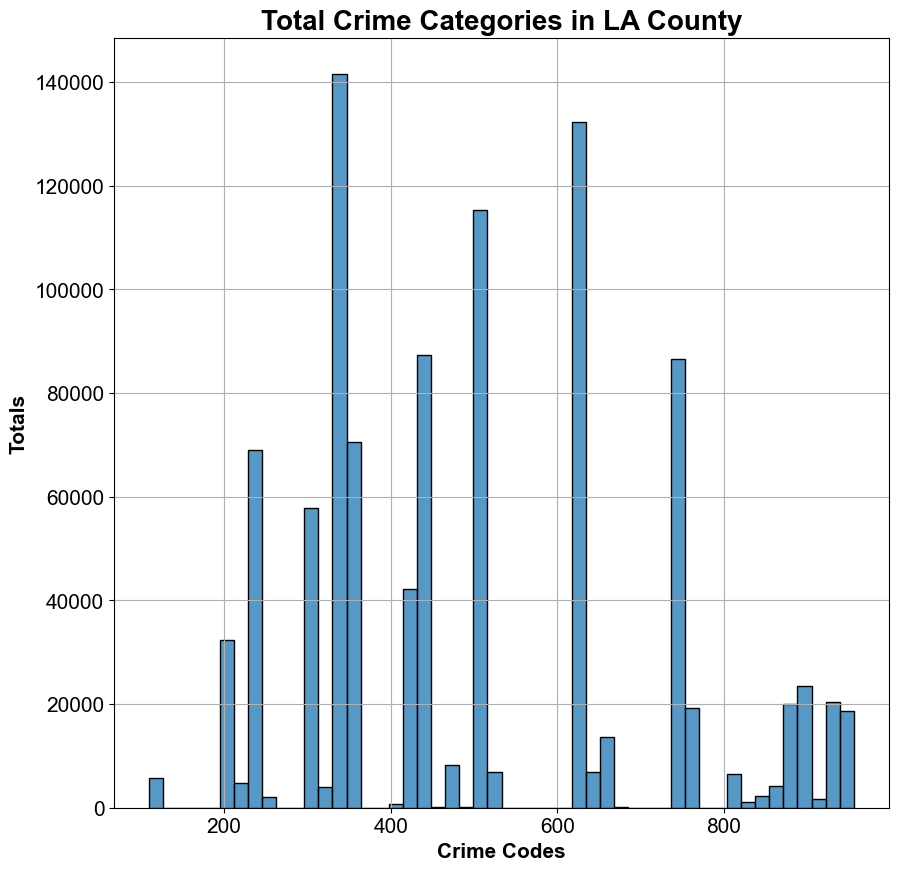

In [28]:
# Plot crime categories for LA County.
sns.histplot(data=la_crime, x = 'crm_cd', bins=50)
plt. title('Total Crime Categories in LA County', fontsize=20, weight='bold')
plt.xlabel('Crime Codes', weight='bold')
plt.ylabel('Totals', weight='bold')
sns.set_style("white")


plt.show()

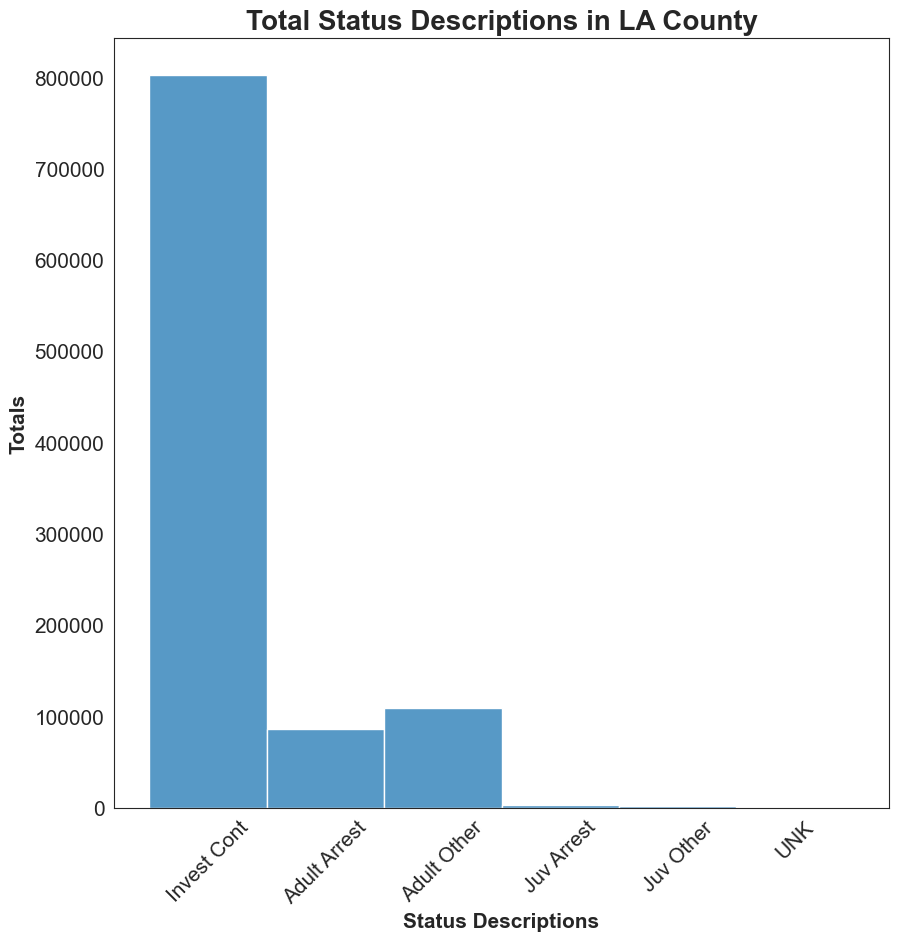

In [29]:
# Plot status descriptions for LA County.
sns.histplot(data=la_crime, x = 'status_desc', bins=20)
plt. title('Total Status Descriptions in LA County', fontsize=20, weight='bold')
plt.xlabel('Status Descriptions', weight='bold')
plt.ylabel('Totals', weight='bold')
plt.xticks(rotation=45)
sns.set_style("white")

plt.show()

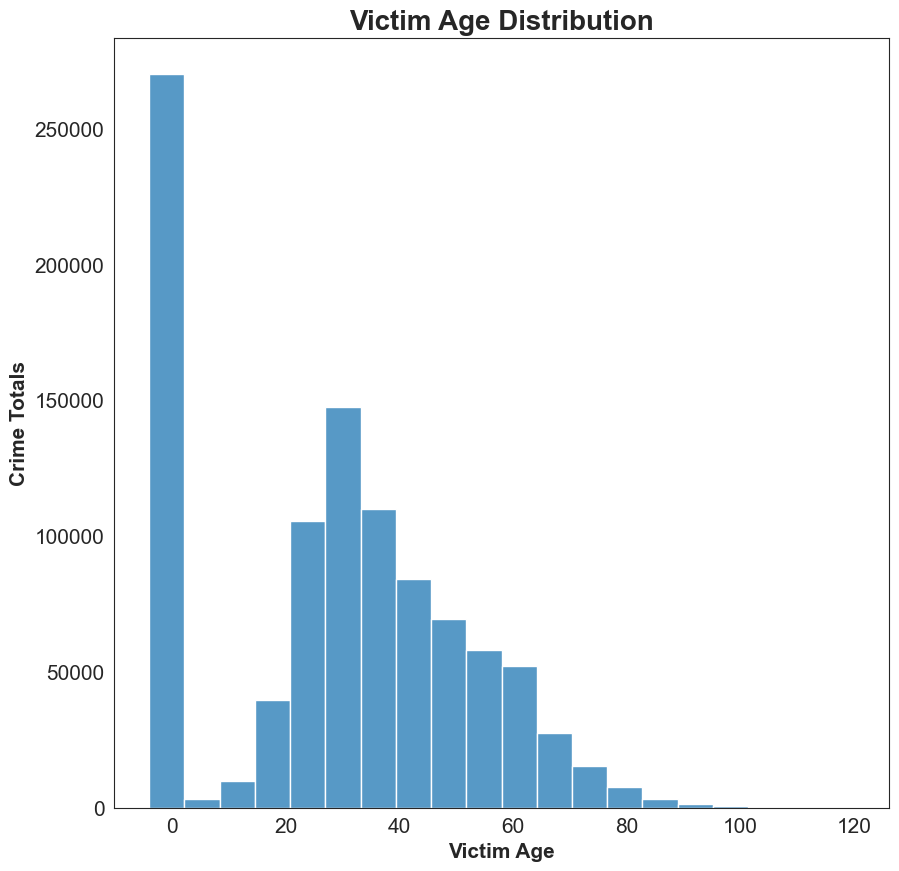

In [30]:
# Plot victim age distribution.
sns.histplot(data= la_crime, x = 'vict_age', bins = 20)
plt.title('Victim Age Distribution', fontsize=20, weight='bold')
plt.xlabel('Victim Age', weight='bold')
plt.ylabel('Crime Totals', weight='bold')
sns.set_style("white")
plt.show()

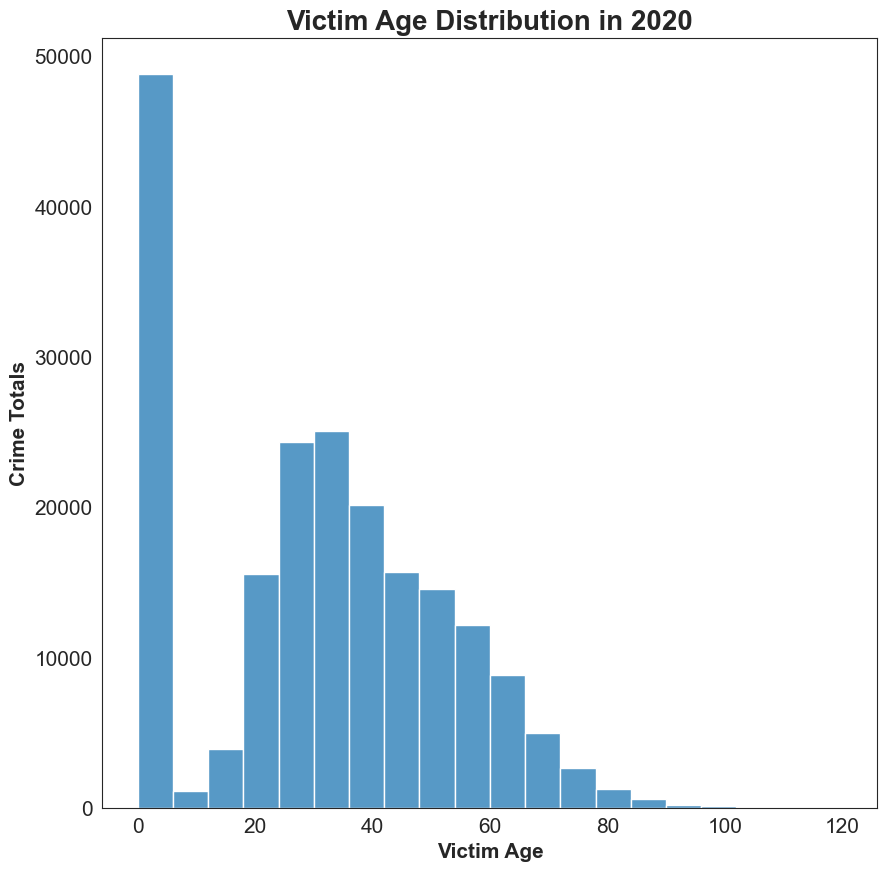

In [31]:
# Plot victim age distribution for 2020.
sns.histplot(data= la_crime_2020, x = 'vict_age', bins = 20)
plt.title('Victim Age Distribution in 2020', fontsize=20, weight='bold')
plt.xlabel('Victim Age', weight='bold')
plt.ylabel('Crime Totals', weight='bold')
sns.set_style("white")
plt.show()

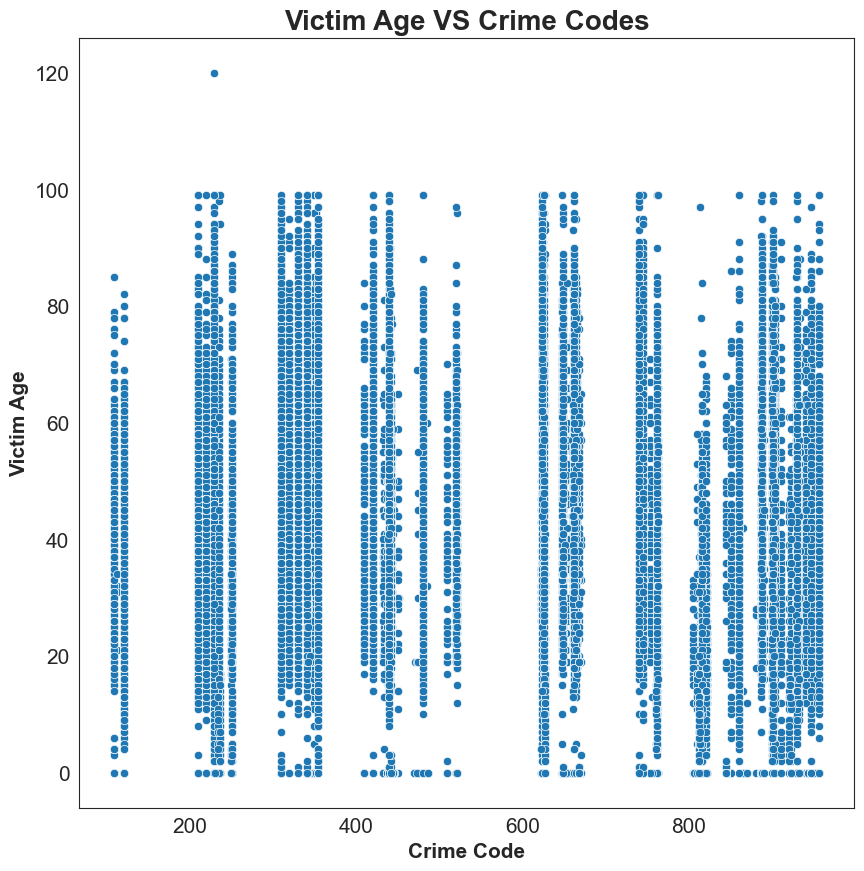

In [32]:
# Scatterplot of victim age vs crime codes.
sns.scatterplot(data=la_crime_2020, x='crm_cd', y='vict_age')
plt.title('Victim Age VS Crime Codes', fontsize=20, weight='bold')
plt.xlabel('Crime Code', weight='bold')
plt.ylabel('Victim Age', weight='bold')
sns.set_style("white")
plt.show()

<h1><center>Build Models</center></h1>

K Nearest Neighbor

In [33]:
# View columns.
la_crime.columns

Index(['dr_no', 'date', 'time', 'area', 'rpt_dist_no', 'part_1_2', 'crm_cd',
       'vict_age', 'status_desc', 'lat', 'lon'],
      dtype='object')

In [34]:
# Drop unneeded columns.
la_crime_knn = la_crime.drop(columns=['dr_no', 'date', 'time',])

In [35]:
# Create one hot encoding.
la_crime_knn = pd.get_dummies(la_crime_knn).replace({True: 1, False: 0})

In [36]:
# View dataframe with one hot encoding.
la_crime_knn.head()

,area,rpt_dist_no,part_1_2,crm_cd,vict_age,lat,lon,status_desc_Adult Arrest,status_desc_Adult Other,status_desc_Invest Cont,status_desc_Juv Arrest,status_desc_Juv Other,status_desc_UNK
0,18,1823,1,210,50,33.9456,-118.2652,0,0,1,0,0,0
1,18,1802,2,745,53,33.9587,-118.2827,0,0,1,0,0,0
2,19,1998,1,442,39,34.2153,-118.4409,1,0,0,0,0,0
3,18,1802,2,626,34,33.9536,-118.2782,0,0,1,0,0,0
4,17,1785,2,624,17,34.2355,-118.5404,0,1,0,0,0,0


In [37]:
# Create X and y variables.
X_knn = la_crime_knn.drop(columns=['crm_cd'])
y_knn = la_crime_knn['crm_cd']

In [38]:
# Split data in trainig and testing sets.
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn, 
                                                                    test_size=0.20, 
                                                                    random_state=75)

In [39]:
# View training and testing data dimeensions.
print("X_train shape:\n", X_train_knn.shape)
print("\nXtest shape:\n", X_test_knn.shape)
print("\ny_train shape:\n", y_train_knn.shape)
print("\ny_test shape:\n", y_test_knn.shape)

X_train shape:
 (804049, 12)

Xtest shape:
 (201013, 12)

y_train shape:
 (804049,)

y_test shape:
 (201013,)


In [40]:
# build knn model.
knn=KNeighborsClassifier(n_neighbors=20)

In [41]:
# Train the knn model
model_knn = knn.fit(X_train_knn,y_train_knn)

In [42]:
# Build the predition object.
y_pred_knn = model_knn.predict(X_test_knn)

In [43]:
# Calculate score for knn.
model_knn.score(X_test_knn, y_test_knn)

0.31578554620845417

In [44]:
# Build confusion matrix.
cm = confusion_matrix(y_test_knn, y_pred_knn)
cm

array([[ 1,  0,  0, ...,  0,  0,  0],
       [ 1, 10,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  2,  0, ...,  0,  0,  4]], shape=(133, 133))

In [45]:
# Print classification report.
print("Classification Report:\n", classification_report(y_test_knn, y_pred_knn))

Classification Report:
               precision    recall  f1-score   support

         110       0.08      0.00      0.01       335
         121       0.08      0.01      0.02       770
         122       0.00      0.00      0.00        79
         210       0.15      0.11      0.13      6569
         220       0.00      0.00      0.00       966
         230       0.23      0.31      0.26     10798
         231       0.32      0.12      0.18       221
         235       0.00      0.00      0.00       109
         236       0.25      0.07      0.11      2522
         237       0.15      0.06      0.09       225
         250       0.00      0.00      0.00        89
         251       0.00      0.00      0.00       352
         310       0.21      0.27      0.24     11573
         320       0.00      0.00      0.00       812
         330       0.24      0.45      0.31     12598
         331       0.15      0.14      0.15      7433
         341       0.18      0.08      0.11      7031
   

KNN Model without categorical data.


In [46]:
# Create X and y variables.
X_knn_1 = la_crime.drop(columns=['dr_no','date','time','crm_cd', 'status_desc'])
y_knn_1 = la_crime['crm_cd']

In [47]:
# Split data into training and testing sets.
X_train_knn_1, X_test_knn_1, y_train_knn_1, y_test_knn_1 = train_test_split(X_knn_1, y_knn_1,
                                                                            test_size=0.20,
                                                                            random_state=76)

In [48]:
# Build knn model
knn_1=KNeighborsClassifier(n_neighbors=20)

In [49]:
# Train the model
model_knn_1 = knn_1.fit(X_train_knn_1,y_train_knn_1)

In [50]:
# Build prediction object.
y_pred_knn_1 = model_knn_1.predict(X_test_knn_1)

In [51]:
# Calculate model accuracy.
model_knn_1.score(X_test_knn_1, y_test_knn_1)

0.3053732843149448

<h1><center>Multiple Linear Regression Model</center></h1>

In [52]:
la_crime.head()

,dr_no,date,time,area,rpt_dist_no,part_1_2,crm_cd,vict_age,status_desc,lat,lon
0,201804032,2020-01-01,1250,18,1823,1,210,50,Invest Cont,33.9456,-118.2652
1,201804035,2020-01-01,1430,18,1802,2,745,53,Invest Cont,33.9587,-118.2827
2,201904054,2020-01-01,1300,19,1998,1,442,39,Adult Arrest,34.2153,-118.4409
3,201804023,2020-01-01,140,18,1802,2,626,34,Invest Cont,33.9536,-118.2782
4,201704023,2020-01-01,20,17,1785,2,624,17,Adult Other,34.2355,-118.5404


In [53]:
# Create dummy variable for crime data.
la_crime_onehot = pd.get_dummies(la_crime).replace({True: 1, False: 0})

In [54]:
# View new dataframe with the dummy variables.
la_crime_onehot.head()

,dr_no,date,time,area,rpt_dist_no,part_1_2,crm_cd,vict_age,lat,lon,status_desc_Adult Arrest,status_desc_Adult Other,status_desc_Invest Cont,status_desc_Juv Arrest,status_desc_Juv Other,status_desc_UNK
0,201804032,2020-01-01,1250,18,1823,1,210,50,33.9456,-118.2652,0,0,1,0,0,0
1,201804035,2020-01-01,1430,18,1802,2,745,53,33.9587,-118.2827,0,0,1,0,0,0
2,201904054,2020-01-01,1300,19,1998,1,442,39,34.2153,-118.4409,1,0,0,0,0,0
3,201804023,2020-01-01,140,18,1802,2,626,34,33.9536,-118.2782,0,0,1,0,0,0
4,201704023,2020-01-01,20,17,1785,2,624,17,34.2355,-118.5404,0,1,0,0,0,0


In [55]:
la_crime_onehot = la_crime_onehot.drop(columns=['dr_no', 
                                                'date',
                                                'time'], axis=1)

In [56]:
# Split the data into X and y variables.
X = la_crime_onehot.drop(columns=['crm_cd'], axis=1)
y= la_crime_onehot['crm_cd']

In [57]:
# View the X and y variables.
print("X Variables:\n", X.shape)
print("\ny Variable:\n", y.shape)

X Variables:
 (1005062, 12)

y Variable:
 (1005062,)


In [58]:
# Split the data into a training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 1)

In [59]:
# View training and testing data dimeensions.
print("X_train shape:\n", X_train.shape)
print("\nXtest shape:\n", X_test.shape)
print("\ny_train shape:\n", y_train.shape)
print("\ny_test shape:\n", y_test.shape)

X_train shape:
 (804049, 12)

Xtest shape:
 (201013, 12)

y_train shape:
 (804049,)

y_test shape:
 (201013,)


In [60]:
# Create linear regression model.
lm= LinearRegression()

In [61]:
# Fit the data to the model.
model = lm.fit(X_train, y_train)

In [62]:
# Create the prediction object.
y_pred = lm.predict(X_test)

In [63]:
# Uses R squared to check model accuracy. 
r2 = r2_score(y_test, y_pred)
print("R-Squared Score is:\n", r2)

R-Squared Score is:
 0.5182167090444373


Regression with out categorical variables

In [64]:
# Displays first five rows.
la_crime.head()

,dr_no,date,time,area,rpt_dist_no,part_1_2,crm_cd,vict_age,status_desc,lat,lon
0,201804032,2020-01-01,1250,18,1823,1,210,50,Invest Cont,33.9456,-118.2652
1,201804035,2020-01-01,1430,18,1802,2,745,53,Invest Cont,33.9587,-118.2827
2,201904054,2020-01-01,1300,19,1998,1,442,39,Adult Arrest,34.2153,-118.4409
3,201804023,2020-01-01,140,18,1802,2,626,34,Invest Cont,33.9536,-118.2782
4,201704023,2020-01-01,20,17,1785,2,624,17,Adult Other,34.2355,-118.5404


In [65]:
# Removes unneeded columns.
la_crime = la_crime.drop(columns=['dr_no','date', 'time','status_desc'], axis=1)

In [66]:
# Split the data into X and y variables.
X_1 = la_crime.drop(columns=['crm_cd'], axis=1)
y_1= la_crime['crm_cd']

In [67]:
# Split the data into a training and testing set.
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size= 0.2, random_state= 50)

In [68]:
# Build linear model.
lm_1= LinearRegression()

In [69]:
# Fit the data to the model.
model_1 = lm_1.fit(X_train_1, y_train_1)

In [70]:
# Create the prediction model.
y_pred_1 = lm_1.predict(X_test_1)

In [71]:
# Check the accuracy of the model.
r2_1 = r2_score(y_test_1, y_pred_1)
print("R-Squared Score is:\n", r2_1)

R-Squared Score is:
 0.5146100822681889


<h1><center>Random Forest Classifier</center></h1>

In [72]:
# Create dummy variables for the random forest model.
la_crime_onehot_1 = pd.get_dummies(la_crime)
la_crime_onehot_1 = la_crime_onehot.replace({True: 1, False: 0})

In [73]:
# View the columns in the data.
la_crime_onehot_1.columns

Index(['area', 'rpt_dist_no', 'part_1_2', 'crm_cd', 'vict_age', 'lat', 'lon',
       'status_desc_Adult Arrest', 'status_desc_Adult Other',
       'status_desc_Invest Cont', 'status_desc_Juv Arrest',
       'status_desc_Juv Other', 'status_desc_UNK'],
      dtype='object')

In [74]:
# Split data in X and y variables.
X = la_crime_onehot_1.drop(columns=['crm_cd'])
y = la_crime_onehot_1['crm_cd']

In [75]:
# Split the data into a training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 2)

In [76]:
# Ceate Random Forest Classifier object.
rf = RandomForestClassifier()

In [77]:
# Create Random Forest Model.
rf_model = rf.fit(X_train, y_train)

In [78]:
# Predict using the Random Forest Model.
y_pred_rf = rf_model.predict(X_test)

In [79]:
# Check the accuracy of the model.
accuracy = rf_model.score(X_test, y_test)
print("Random Forest Model Accuracy is:\n", accuracy)

Random Forest Model Accuracy is:
 0.343559869262187


In [80]:
# View the classification report for random forest model.
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

         110       0.05      0.03      0.04       287
         113       0.00      0.00      0.00         0
         121       0.08      0.06      0.07       753
         122       0.00      0.00      0.00        62
         210       0.17      0.14      0.15      6346
         220       0.03      0.02      0.02       994
         230       0.31      0.37      0.34     10651
         231       0.44      0.38      0.41       222
         235       0.24      0.17      0.20       126
         236       0.24      0.23      0.24      2448
         237       0.14      0.14      0.14       221
         250       0.14      0.08      0.10        87
         251       0.13      0.10      0.12       308
         310       0.31      0.32      0.32     11637
         320       0.05      0.02      0.03       822
         330       0.31      0.35      0.33     12761
         331       0.21      0.21      0.21      7323
   

In [81]:
# Checks to see which features are most important.
features = pd.DataFrame({'Feature': X_train.columns, 'Importance': rf_model.feature_importances_})

In [82]:
# Views the feature importance values.
features.head(12)

,Feature,Importance
0,area,0.008442
1,rpt_dist_no,0.103968
2,part_1_2,0.069862
3,vict_age,0.314362
4,lat,0.237959
5,lon,0.245641
6,status_desc_Adult Arrest,0.003017
7,status_desc_Adult Other,0.005279
8,status_desc_Invest Cont,0.010794
9,status_desc_Juv Arrest,0.000354


<h1><center>Random Forest with hyperparameters</center></h1>

In [83]:
# Create the X and y variables
X1 = la_crime_onehot_1.drop(columns=['crm_cd', 'status_desc_Adult Arrest', 'status_desc_Adult Other',
       'status_desc_Invest Cont', 'status_desc_Juv Arrest',
       'status_desc_Juv Other', 'status_desc_UNK'])
y1 = la_crime_onehot_1['crm_cd']

In [84]:
# Split data to train and test data.
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size= 0.2, random_state= 24)

In [85]:
# Refine the Random Forest Classifier with hyperparameters.
rf_2 = RandomForestClassifier(n_estimators = 100,
                              criterion='entropy',
                              max_depth= 10,
                              min_samples_split= 2,
                              random_state = 3)

In [86]:
# Fit the data to the model.
rf_model_2 = rf_2.fit(X1_train, y1_train)

In [87]:
# Checks the accuracy of the model.
accuracy_1 = rf_model_2.score(X1_test, y1_test)
print("Refined Random Forest Model Accuracy is:\n", accuracy_1)

Refined Random Forest Model Accuracy is:
 0.32438200514394594


<h1><center>Models with Segmented Data</center><h1>

2020 Regression 


In [88]:
# Create one hot encoding on the categorical variables.
la_crime_2020_oneshot = pd.get_dummies(la_crime_2020).replace({True: 1, False: 0})

In [89]:
# View first five rows.
la_crime_2020_oneshot.head()

,dr_no,date,time,area,rpt_dist_no,part_1_2,crm_cd,vict_age,lat,lon,status_desc_Adult Arrest,status_desc_Adult Other,status_desc_Invest Cont,status_desc_Juv Arrest,status_desc_Juv Other
0,201804032,2020-01-01,1250,18,1823,1,210,50,33.9456,-118.2652,0,0,1,0,0
1,201804035,2020-01-01,1430,18,1802,2,745,53,33.9587,-118.2827,0,0,1,0,0
2,201904054,2020-01-01,1300,19,1998,1,442,39,34.2153,-118.4409,1,0,0,0,0
3,201804023,2020-01-01,140,18,1802,2,626,34,33.9536,-118.2782,0,0,1,0,0
4,201704023,2020-01-01,20,17,1785,2,624,17,34.2355,-118.5404,0,1,0,0,0


In [90]:
# Create X and y variables.
X_2020 = la_crime_2020_oneshot.drop(columns=['dr_no', 
                                             'date', 
                                             'time',
                                             'crm_cd'], axis = 1)
y_2020 = la_crime_2020_oneshot['crm_cd']

In [91]:
# Create train and test data.
X_train_2020, X_test_2020, y_train_2020, y_test_2020 = train_test_split(X_2020, y_2020, 
                                                                        test_size= 0.20,
                                                                        random_state = 40)

In [92]:
# Create linear regression model.
lm_2020 = LinearRegression()

In [93]:
# Fit the data to the model.
model_2020 = lm_2020.fit(X_train_2020, y_train_2020)

In [94]:
# Create the prediction object.
y_pred_2020 = lm_2020.predict(X_test_2020)

In [95]:
# check accuracy of model.
lm_2020_acc = r2_score(y_test_2020, y_pred_2020)

In [96]:
# View the score of the model.
lm_2020_acc

0.5609791698742972

2020 KNN

In [97]:
# Prepare dataframe for analysis.
la_crime_2020_oneshot = pd.get_dummies(la_crime_2020).replace({True: 1, False: 0})
la_crime_2020_knn = la_crime_2020_oneshot

In [98]:
# Create X and y variables for KNN.
X_2020_knn = la_crime_2020_knn.drop(columns = ['dr_no',
                                               'date',
                                               'time',
                                               'crm_cd'], axis=1)
y_2020_knn = la_crime_2020_knn['crm_cd']

In [99]:
# Split data into train and test sets.
X_train_2020_knn, X_test_2020_knn, y_train_2020_knn, y_test_2020_knn = train_test_split(X_2020_knn, 
                                                                                        y_2020_knn, 
                                                                        test_size= 0.20,
                                                                        random_state = 41)

In [100]:
# Create KNN model.
knn_2020=KNeighborsClassifier()


In [101]:
# Fit the data to the model.
model_knn_2020 = knn_2020.fit(X_train_2020_knn, y_train_2020_knn)

In [102]:
# Create the prediction object.
y_pred_knn_2020 = model_knn_2020.predict(X_test_2020_knn)

In [103]:
# Check the accuracy of the model
model_knn_2020.score(X_test_2020_knn, y_test_2020_knn)

0.22897172879659744

2020 Random Forest

In [104]:
# Prepare the data for analysis.
la_crime_2020_oneshot = pd.get_dummies(la_crime_2020).replace({True: 1, False: 0})
la_crime_2020_rf = la_crime_2020_oneshot

In [105]:
# Split data into X and y variables.
X_2020_rf = la_crime_2020_rf.drop(columns=['dr_no',
                                           'date',
                                           'time',
                                           'crm_cd'], axis = 1)
y_2020_rf = la_crime_2020_rf['crm_cd']

In [106]:
# Split data into train and test sets.
X_train_2020_rf, X_test_2020_rf, y_train_2020_rf, y_test_2020_rf = train_test_split(X_2020_rf,
                                                                                    y_2020_rf,
                                                                                    test_size= 0.20,
                                                                                    random_state=0)

In [107]:
# Build the random forest model.
rf_2020 = RandomForestClassifier(n_estimators = 100,
                              criterion='entropy',
                              max_depth= 10,
                              min_samples_split= 2,
                              random_state = 0)

In [108]:
# Fit the data to the model.
rf_model_2020 = rf_2020.fit(X_train_2020_rf, y_train_2020_rf)

In [109]:
# Check for model accuracy.
accuracy_2020 = rf_model_2020.score(X_test_2020_rf, y_test_2020_rf)
print("Refined Random Forest Model Accuracy is:\n", accuracy_2020)

Refined Random Forest Model Accuracy is:
 0.3350763072304228


2021 Regression

In [110]:
# Prep data for analysis.
la_crime_2021_oneshot = pd.get_dummies(la_crime_2021).replace({True: 1, False: 0})

In [111]:
# Split data in X and y variables.
X_2021 = la_crime_2021_oneshot.drop(columns=['dr_no', 
                                             'date', 
                                             'time',
                                             'crm_cd'], axis = 1)
y_2021 = la_crime_2021_oneshot['crm_cd']

In [112]:
# Split data into train and test sets.
X_train_2021, X_test_2021, y_train_2021, y_test_2021 = train_test_split(X_2021, y_2021, 
                                                                        test_size= 0.20,
                                                                        random_state = 100)

In [113]:
# Create linear regression model.
lm_2021 = LinearRegression()

In [114]:
# Fit the data to the model.
model_2021 = lm_2021.fit(X_train_2021, y_train_2021)


In [115]:
# Create a prediction model.
y_pred_2021 = lm_2021.predict(X_test_2021)

In [116]:
# Check for model accuracy.
lm_2021_acc = r2_score(y_test_2021, y_pred_2021)

In [117]:
# View the score for the model
lm_2021_acc

0.5399210946589175

2021 K Nearest Neighbor

In [118]:
# Prep data for analysis
la_crime_2021_oneshot = pd.get_dummies(la_crime_2021).replace({True: 1, False: 0})

In [119]:
# Create X and y variables.
X_2021_knn = la_crime_2021_oneshot.drop(columns=['dr_no', 
                                             'date', 
                                             'time',
                                             'crm_cd'], axis = 1)
y_2021_knn = la_crime_2021_oneshot['crm_cd']

In [120]:
# Split data into train and test sets.
X_train_2021_knn, X_test_2021_knn, y_train_2021_knn, y_test_2021_knn = train_test_split(X_2021_knn,
                                                                                        y_2021_knn, 
                                                                                        test_size= 0.20,
                                                                                        random_state = 101)

In [121]:
# Build the KNN model.
knn_2021=KNeighborsClassifier()

In [122]:
# Fit the data to the model.
model_knn_2021 = knn_2021.fit(X_train_2021_knn, y_train_2021_knn)

In [123]:
# Create prediction object.
y_pred_knn_2021 = model_knn_2021.predict(X_test_2021_knn)

In [124]:
# Check model accuracy.
model_knn_2021.score(X_test_2021_knn, y_test_2021_knn)

0.23861254049933295

2021 Random Forest

In [125]:
# Prep data for analysis.
la_crime_2021_oneshot = pd.get_dummies(la_crime_2021).replace({True: 1, False: 0})

In [126]:
# Create X and y variables.
X_2021_rf = la_crime_2021_oneshot.drop(columns=['dr_no', 
                                             'date', 
                                             'time',
                                             'crm_cd'], axis = 1)
y_2021_rf = la_crime_2021_oneshot['crm_cd']

In [127]:
# Split data into train and test sets.
X_train_2021_rf, X_test_2021_rf, y_train_2021_rf, y_test_2021_rf = train_test_split(X_2021_rf,
                                                                                        y_2021_rf, 
                                                                                        test_size= 0.20,
                                                                                        random_state = 102)

In [128]:
# Create random forest model.
rf_2021=RandomForestClassifier(n_estimators = 100,
                              criterion='entropy',
                              max_depth= 10,
                              min_samples_split= 2,
                              random_state = 0)

In [129]:
# Fit data to the model.
rf_model_2021 = rf_2021.fit(X_train_2021_rf, y_train_2021_rf)

In [130]:
# Check the accuracy of the model.
accuracy_2021 = rf_model_2021.score(X_test_2021_rf, y_test_2021_rf)
print("Refined Random Forest Model Accuracy is:\n", accuracy_2021)

Refined Random Forest Model Accuracy is:
 0.34109967600533636
